In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

#Extracting information about conferences on databases
#that took place between 14-may-2015 and 10-may-2020
#link used for web scraping 
#http://www.allconferences.com/search/index/Category__parent_id:493198/Conference__start_date__from:05-14-2015/Conference__start_date__to:05-10-2020/showLastConference:1/page:3/
#pages-1,2,3

pages = []
conf_name = []
conf_date = []
for i in range(1, 4):
    url = 'http://www.allconferences.com/search/index/Category__parent_id:493198/Conference__start_date__from:05-14-2015/Conference__start_date__to:05-10-2020/showLastConference:1/page:' + str(i) + '/'
    pages.append(url)
    
for page in pages: 
    #collecting the first page of conferences and creating a beautiful soup object
    page = requests.get(page)
    soup = BeautifulSoup(page.text, 'html.parser')

    C_list = soup.find(id ='categories_conferences')


    last_links_1 = soup.find(class_='order_option')
    last_links_1.decompose()
    last_links_2 = soup.find(class_='pager')
    last_links_2.decompose()
    last_links_3 = soup.find(id='categoryViewFormEmptList')
    last_links_3.decompose()

    list_items = C_list.find_all('h2')

    for x in list_items:
        names = x.a.text
        conf_name.append(names)
        print(names)

    list_items_date = C_list.find_all('span')
    
    for k in list_items_date:
        date = k.contents[1].strip()
        conf_date.append(date)
        print(date)


2020 3rd International Conference on Geoinformatics and Data Analysis (ICGDA 2020)--EI,SCOPUS
IEEE--2020 The 5th International Conference on Big Data Analytics (ICBDA 2020)--Ei,Scopus
ICISDM 2018 2nd International Conference on Information System and Data Mining_IEEE Xplore,Ei,Scopus
ICDDM 2016 5th International Workshops on Database and Data Mining_EI Compendex
2020 IEEE 5th Int. Conf. on Cloud Computing and Big Data Analytics (IEEE ICCCBDA 2020)-Scopus,Ei
ACM--2020 The 4th International Conference on Compute and Data Analysis (ICCDA 2020)--Ei,Scopus
2020 The 3rd International Conference on Big Data and Smart Computing (ICBDSC 2020)--Ei,Scopus
ACM--2020 the 6th International Conference on Computing and Data Engineering (ICCDE 2020)--Ei,Scopus
2020 2nd International Conference on Big Data Engineering and Technology (BDET 2020)--Ei,Scopus
2019 3rd International Conference on Big Data Research (ICBDR 2019)--EI,Scopus
2019 the 2nd International Conference on Computing and Big Data (ICCBD 

In [2]:
print(conf_name)

[u'2020 3rd International Conference on Geoinformatics and Data Analysis (ICGDA 2020)--EI,SCOPUS', u'IEEE--2020 The 5th International Conference on Big Data Analytics (ICBDA 2020)--Ei,Scopus', u'ICISDM 2018 2nd International Conference on Information System and Data Mining_IEEE Xplore,Ei,Scopus', u'ICDDM 2016 5th International Workshops on Database and Data Mining_EI Compendex', u'2020 IEEE 5th Int. Conf. on Cloud Computing and Big Data Analytics (IEEE ICCCBDA 2020)-Scopus,Ei', u'ACM--2020 The 4th International Conference on Compute and Data Analysis (ICCDA 2020)--Ei,Scopus', u'2020 The 3rd International Conference on Big Data and Smart Computing (ICBDSC 2020)--Ei,Scopus', u'ACM--2020 the 6th International Conference on Computing and Data Engineering (ICCDE 2020)--Ei,Scopus', u'2020 2nd International Conference on Big Data Engineering and Technology (BDET 2020)--Ei,Scopus', u'2019 3rd International Conference on Big Data Research (ICBDR 2019)--EI,Scopus', u'2019 the 2nd International C

In [3]:
while("" in conf_date) : 
    conf_date.remove("")
print(conf_date)

[u'Apr 17, 2020', u'May 11, 2020', u'Apr 11, 2018', u'Jul 07, 2016', u'Apr 13, 2020', u'Mar 12, 2020', u'Jan 15, 2020', u'Jan 06, 2020', u'Jan 05, 2020', u'Nov 22, 2019', u'Oct 20, 2019', u'Aug 30, 2019', u'Aug 30, 2019', u'Jul 07, 2019', u'Jun 18, 2019', u'May 13, 2019', u'May 12, 2019', u'Apr 08, 2019', u'Mar 18, 2019', u'Oct 26, 2018', u'Aug 06, 2018', u'Jun 29, 2018', u'Apr 22, 2018', u'Mar 25, 2018', u'Feb 28, 2018', u'Jun 04, 2017', u'Apr 30, 2017', u'Mar 12, 2017', u'May 26, 2019 06:00 PM', u'Apr 28, 2019 06:00 PM', u'Aug 26, 2018 06:00 PM', u'Jul 29, 2018 06:00 PM', u'Jul 29, 2018 06:00 PM', u'Jul 15, 2018 06:00 PM', u'Jun 24, 2018 06:00 PM', u'Jun 24, 2018 06:00 PM', u'Apr 29, 2018 06:00 PM', u'Feb 25, 2018 06:00 PM', u'Feb 25, 2018 06:00 PM', u'Feb 18, 2018 06:00 PM', u'Jan 03, 2018 06:00 PM', u'Oct 29, 2017 06:00 PM', u'Dec 31, 2016 06:00 PM', u'Oct 16, 2015 05:00 PM']


In [4]:
#Grouping the conferences by month and count of each month

s = pd.to_datetime(pd.Series(conf_date), format='%b %d, %Y',errors="coerce")
s.index = s.dt.to_period('m')
s = s.groupby(level=0).size()

s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='m'), fill_value=0)

print (s)

2016-07    1
2016-08    0
2016-09    0
2016-10    0
2016-11    0
2016-12    0
2017-01    0
2017-02    0
2017-03    1
2017-04    1
2017-05    0
2017-06    1
2017-07    0
2017-08    0
2017-09    0
2017-10    0
2017-11    0
2017-12    0
2018-01    0
2018-02    1
2018-03    1
2018-04    2
2018-05    0
2018-06    1
2018-07    0
2018-08    1
2018-09    0
2018-10    1
2018-11    0
2018-12    0
2019-01    0
2019-02    0
2019-03    1
2019-04    1
2019-05    2
2019-06    1
2019-07    1
2019-08    2
2019-09    0
2019-10    1
2019-11    1
2019-12    0
2020-01    3
2020-02    0
2020-03    1
2020-04    2
2020-05    1
Freq: M, dtype: int64


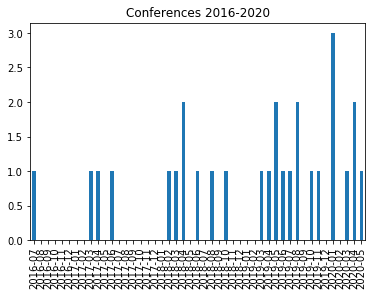

In [7]:
s.plot.bar(title='Conferences 2016-2020')

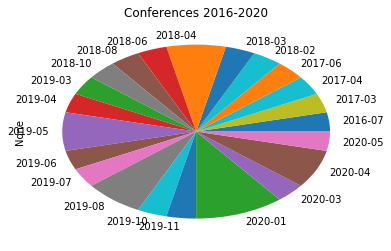

In [9]:
s.plot.pie(title='Conferences 2016-2020')

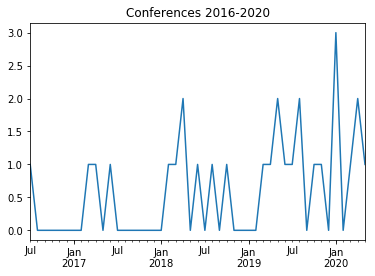

In [10]:
s.plot.line(title='Conferences 2016-2020')